# Experiment 1: All metrics / Default parameters / TSB

## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [3]:
project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'allmetrics_defparams_tsb')
results_path = os.path.join(experiment_path, 'results')

save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(save_fig_path, exist_ok=True)

In [4]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 7


In [98]:
# color_palette = {
#     'FF-VUS-PR': 'lightgreen',      # Good, 
#     'FF-VUS-PR-GPU': 'lightblue',   # Very Good
#     'AUC-PR': 'lightcoral',         # Secondary competitor
#     'VUS-PR': 'orange',             # Main competitor
#     'RF': 'lightgrey',              # Useless competitors
#     'AFFILIATION': 'lightgrey',     # Useless competitors
#     'RANGE-AUC-PR': 'lightgrey',    # Useless competitors
# }
# color_palette = {
#     'FF-VUS-PR': 'limegreen',          # Good
#     'FF-VUS-PR-GPU': 'dodgerblue',     # Very Good
#     'AUC-PR': 'salmon',                # Secondary competitor
#     'VUS-PR': 'darkorange',            # Main competitor
#     'RF': 'silver',                    # Useless competitors
#     'AFFILIATION': 'gainsboro',        # Useless competitors
#     'RANGE-AUC-PR': 'lightgrey',       # Useless competitors
# }

# color_palette = {
#     'FF-VUS-PR': '#99cae4',          # Good
#     'FF-VUS-PR-GPU': '#40da70',     # Very Good
#     'AUC-PR': '#f1a73f',                # Secondary competitor
#     'VUS-PR': '#b02a41',            # Main competitor
#     'RF': '#a6d2c3',                    # Useless competitors
#     'AFFILIATION': '#95bdaf',        # Useless competitors
#     'RANGE-AUC-PR': '#84a89c',       # Useless competitors
# }

formal_names = {
    'FF-VUS-PR': 'FF-VUS (L: 128)',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU (L: 128)',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS (L: 128)',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC (L: 128)',
}

color_palette = {
    'FF-VUS (L: 128)': '#99cae4',          # Good
    'FF-VUS-GPU (L: 128)': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS (L: 128)': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC (L: 128)': '#84a89c',       # Useless competitors
}

In [99]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)
    
df['Metric'] = df['Metric'].map(formal_names)
df.sample(3)

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 122.30it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Metric,Metric value,Metric time,Step,Global mask,...,Safe mask time,Thresholds time,Score mask time,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Anomalies coordinates time
11557,OPPORTUNITY/S2-ADL5.test.csv@81.out,31312,2,579.0,NaN,AUC,0.103924,0.003654,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,SMD/machine-1-2.test.csv@4.out,23693,10,54.2,128.0,FF-VUS (L: 128),0.047995,0.014620,1.0,True,...,0.000298,0.001258,0.001214,0.0006,0.001606,0.004215,0.002714,0.000223,0.000141,NaN
10702,YAHOO/YahooA3Benchmark-TS61_data.out,1679,13,1.0,NaN,RF,0.162162,0.016842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis

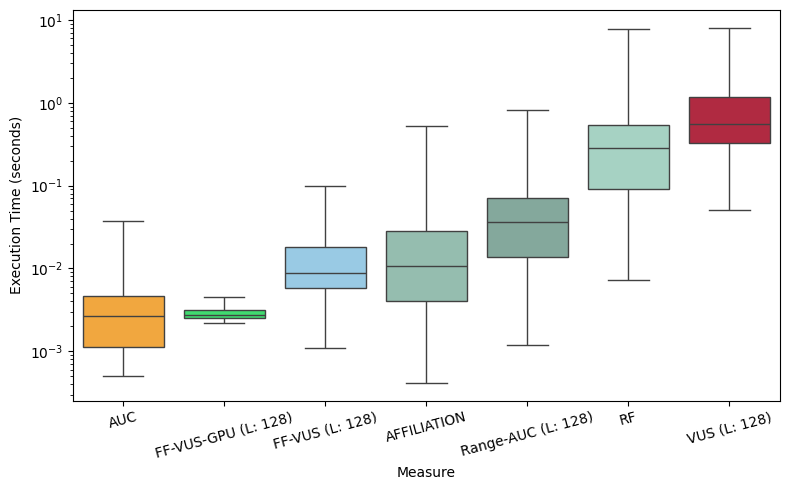

In [107]:
# What is the execution time difference
median_times = df.groupby('Metric')['Metric time'].median()
order = median_times.sort_values().index.to_list()

plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Metric', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    order=order, 
    saturation=1,
)
plt.xlabel('Measure')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_comparison.svg'))
plt.show()

In [108]:
# # What is the error between the difference metrics
# plt.figure(figsize=(8, 5))
# metrics = df['Metric'].unique()

# values_df = df[['Time series', 'Metric', 'Metric value']]
# values_df = values_df.pivot(columns='Metric', index='Time series', values='Metric value')
# dif_df = values_df.copy()
# for metric in metrics: 
#     dif_df[metric] = values_df[metric] - values_df['AUC']
# dif_df

# sns.boxplot(dif_df.abs(), showfliers=True, palette=color_palette, order=order, saturation=1)
# plt.xlabel('Measure')
# plt.ylabel('Error to AUC-PR')
# plt.tight_layout()
# plt.savefig(os.path.join(save_fig_path, 'error_to_aucpr.svg'))
# plt.show()

In [110]:
# fig, ax = plt.subplots(3, 1, figsize=(12, 10))
# attributes = ["Length", "Number of anomalies", "Anomalies average length"]
# bins = 20  # adjust based on data spread
# curr_df = df.copy()

# for attribute, axis in zip(attributes, ax):
#     # Bin the attribute
#     # curr_df[f'{attribute}_bin'] = pd.qcut(curr_df[attribute], q=bins, duplicates='drop')
#     curr_df[f'{attribute}_bin'] = pd.cut(curr_df[attribute], bins=bins)
    
#     # Group by bin and metric, compute mean
#     grouped = (
#         curr_df
#         .groupby([f'{attribute}_bin', 'Metric'], observed=False)['Metric time']
#         .mean()
#         .reset_index()
#     )

#     # Convert bin to the midpoint for plotting
#     grouped['bin_center'] = grouped[f'{attribute}_bin'].apply(lambda x: x.mid)

#     # Plot
#     sns.lineplot(
#         x='bin_center',
#         y='Metric time',
#         hue='Metric',
#         data=grouped,
#         ax=axis,
#         palette=color_palette,
#         markers=True,
#         style='Metric'
#     )

#     # axis.set_title(f"Metric Time vs {attribute}")
#     axis.set_xlabel(attribute)
#     axis.set_ylabel("Execution time (seconds)")
#     axis.set_yscale('log')
#     axis.set_xscale('log')
#     axis.grid(axis='both', alpha=0.5)

# plt.tight_layout()
# plt.savefig(os.path.join(save_fig_path, 'exec_time_per_attr.svg'))
# plt.show()